In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

# Testing Boullanger and Wood, 2022
- The CS6+ Term from ONeill and Mavrogenes (2022) and Boulling and Wood (2022) are not directly comparable.

# Base equations

## O'Neill Equation

$$ [S (ppm)] = C_S^{ONeill}*\textit{f}(SO_{3}) $$

## Wood Equation
- Hugh ONeill suggests the match is better if its log S rather than log SO4

$$ log(C_S^{Wood}) = log([S wt\%]) - 0.5*log(\textit{f}(S_2)) - 1.5*log(\textit{f}(O_2)) $$

## Reaction and equilibrium constant

$$ SO_3 = 0.5*S_2 + 1.5*O_2 $$

$$ K = \frac{\textit{f}(SO_3)}{\textit{f}(S_2)^{0.5}*\textit{f}(O_2)^{1.5}} $$

## Workthrough to convert one form to another

Apply log to both sides of equilibrium constant

$$ log(K) = log(\frac{\textit{f}(SO_3)}{\textit{f}(S_2)^{0.5}*\textit{f}(O_2)^{1.5}}) $$

Expand:

$$ log(K) = log(\textit{f}(SO_3)) - 0.5*log(\textit{f}(S_2)) - 1.5*log(\textit{f}(O_2)) $$

Replace the $$ - 0.5*log(\textit{f}(S_2)) - 1.5*log(\textit{f}(O_2)) $$ terms in the Wood equation with $$ log(K) - log(\textit{f}(SO_3))$$:

$$ log(C_S^{Wood}) = log([S wt\%]) + log(K) - log(\textit{f}(SO_3)) $$

Rearrange:

$$ log(C_S^{Wood}) + log(\textit{f}(SO_3)) = log([S (wt\%)]) + log(k) $$

Remove logs:

$$ C_S^{Wood}*\textit{f}(SO_3) = [S (wt\%)]*K $$

Apply conversion to ppm and rearrange for [S (ppm)]:

$$ [S (ppm)] = \frac{10^4*C_S^{Wood}*\textit{f}(SO_3)}{K} $$

Replace [S (ppm)] with O'Neill equation:

$$ C_S^{ONeill}*\textit{f}(SO_3) = \frac{10^4*C_S^{Wood}*\textit{f}(SO_3)}{K} $$

The $\textit{f}(SO_3)$ term cancels and a natural logarithm is then applied to both sides of the equation. Expanding the resulting equation gives:

$$ ln(C_S^{ONeill}) = ln(10^4) + ln(C_S^{Wood}) - ln(K) $$

Rearrange for $$ ln(C_S^{Wood}) $$:

$$ ln(C_S^{Wood}) = ln(C_S^{ONeill}) + ln(K) - ln(10^4) $$

Apply an exponential:

$$ C_S^{Wood} = exp(ln(C_S^{ONeill}) + ln(K)) - 10^4 $$

Apply  log$_{10}$  to both sides:

$$ log(C_S^{Wood}) = log(exp(ln(C_S^{ONeill}) + ln(K))) - log(10^4) $$

$$ log(C_S^{Wood}) = (ln(C_S^{ONeill}) + ln(K))*log(e) - log(10^4) $$

Applying the conversion that $$ log(e) = 1/ln(10) $$:

$$ log(C_S^{Wood}) = \frac{ln(C_S^{ONeill}) + ln(K)}{ln(10)} - log(10^4) $$

## Converting back the other way

Rearranging the equation for $ln(C_S^H)$ from $log(C_S^B)$:

$$ ln(10)*(log(C_S^B) + log(10^4)) - ln(K) = ln(C_S^H) $$

### Lets test this out
- We asked Julien for the major elements they use. 

In [2]:
df_J=ss.import_data('Major_Data_From_Jullien.xlsx', 
                    sheet_name='Feuil1')
df_J.head()

We have replaced all missing liquid oxides and strings with zeros. 


C:\Users\penny\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,...,LogCs measured,mole Fe3+,mole Fe2+,Fe3+/tot,Fe2+/Fetot,Fe3+/Fe2+,Fe2O3/FeO,FeO mol,FeO mol/T,Log CS single oxygen basis
0,49.1,2.97,16.6,7.63,0.23,4.3,9.8,4.28,1.30,0.0,...,8.958721,0.1120,0.0209,0.842739,0.157261,5.358852,2.679426,0.006255,0.000004,8.893229
1,49.1,0.93,14.4,8.88,0.00,8.5,12.4,2.41,0.00,0.0,...,9.025948,0.1214,0.0241,0.834364,0.165636,5.037344,2.518672,0.007653,0.000005,9.022566
2,43.2,2.93,14.3,8.41,2.51,7.7,14.4,2.58,0.45,0.0,...,9.379698,0.1207,0.0217,0.847612,0.152388,5.562212,2.781106,0.006920,0.000005,9.365970
3,47.2,2.55,12.1,9.30,0.00,10.4,10.7,2.92,0.58,0.0,...,9.176976,0.1273,0.0252,0.834754,0.165246,5.051587,2.525794,0.008159,0.000006,9.046668
4,57.7,1.64,20.7,4.88,0.00,2.0,4.6,6.03,2.62,0.0,...,8.628487,0.0697,0.0136,0.836735,0.163265,5.125000,2.562500,0.003832,0.000003,8.568892


### Now lets calculate using Boulling and Wood, and ONeill, and lets calculate using SO4 and S in BW22

In [3]:
BW_calc=ss.calculate_BW2022_CS6(df=df_J, T_K=df_J['T_K'])
OM_calc=ss.calculate_OM2022_CS6(df=df_J, T_K=df_J['T_K'],
                        Fe3Fet_Liq=0)

g:\my drive\berkeley_new\pysulfsat\pysulfsat_structure\src\PySulfSat\s6_corrections.py:328: RuntimeWarning: divide by zero encountered in log10
  deltaQFM=(4*(np.log10(Fe3Fet_Liq/(1-Fe3Fet_Liq))+1.36-2*liqs['Na_Liq_cat_frac']


In [4]:
OM_calc

,LnCS6_calc_OM22_format,LogCS6_calc_BW22_format_SO4,LogCS6_calc_BW22_format,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,...,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,deltaQFM_calc,logfo2_calc,Fe2_Liq_cat_frac
0,13.617551,9.988040,9.562072,49.1,2.97,16.6,7.63,0.23,4.3,9.8,...,0.187503,0.079531,0.015894,0.021411,0.0,0.501141,0.501141,-inf,-inf,0.061154
1,13.499901,9.936946,9.510977,49.1,0.93,14.4,8.88,0.00,8.5,12.4,...,0.161899,0.044575,0.000000,0.006673,0.0,0.630486,0.630486,-inf,-inf,0.070843
2,14.306706,10.287337,9.861368,43.2,2.93,14.3,8.41,2.51,7.7,14.4,...,0.162209,0.048145,0.005525,0.021212,0.0,0.620068,0.620068,-inf,-inf,0.067691
3,13.900422,10.110889,9.684921,47.2,2.55,12.1,9.30,0.00,10.4,10.7,...,0.136432,0.054163,0.007079,0.018350,0.0,0.665929,0.665929,-inf,-inf,0.074407
4,12.859979,9.659031,9.233062,57.7,1.64,20.7,4.88,0.00,2.0,4.6,...,0.221072,0.105943,0.030288,0.011178,0.0,0.422148,0.422148,-inf,-inf,0.036981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,11.254725,6.224151,5.798183,40.3,0.00,11.0,13.83,0.00,15.3,17.2,...,0.120119,0.017246,0.000000,0.000000,0.0,0.663526,0.663526,-inf,-inf,0.107162
78,7.383346,4.542833,4.116864,74.8,0.32,15.1,1.10,0.00,0.3,0.9,...,0.165975,0.063650,0.048781,0.002245,0.0,0.327119,0.327119,-inf,-inf,0.008579
79,10.377385,5.843127,5.417158,48.4,0.00,16.9,0.00,0.00,12.0,22.2,...,0.181083,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,-inf,-inf,0.000000
80,10.152361,5.745400,5.319432,45.6,0.00,19.0,0.00,0.00,17.3,17.7,...,0.198611,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,-inf,-inf,0.000000


## Lets compare our calcs to the spreadsheet
- We expect slight discrepencies, as the spreadsheet they used didnt reference the Na2O column correctly

Text(0.5, 0, 'Boulling and Wood (2022) LogCS6')

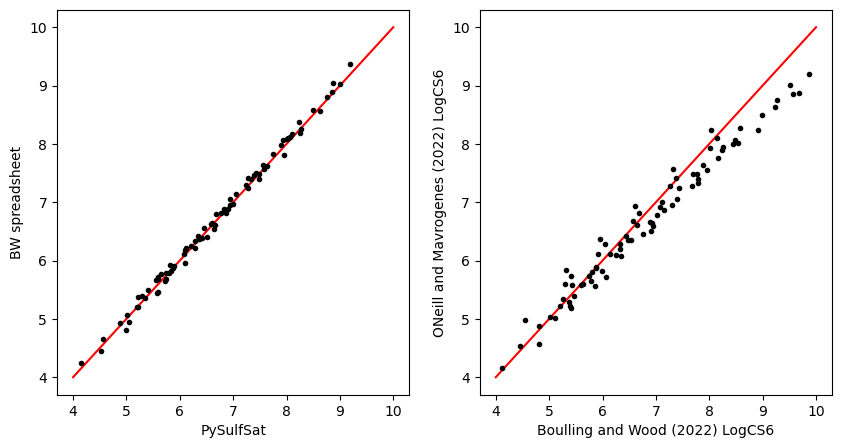

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([4, 10], [4, 10], '-r')
ax1.plot(BW_calc['LogCS6_calc_BW22_format'],
         df_J['Log CS single oxygen basis'], '.k')
ax1.set_ylabel('BW spreadsheet')
ax1.set_xlabel('PySulfSat')
ax2.plot([4, 10], [4, 10], '-r')
ax2.plot(OM_calc['LogCS6_calc_BW22_format'],
         BW_calc['LogCS6_calc_BW22_format'], '.k')
ax2.set_ylabel('ONeill and Mavrogenes (2022) LogCS6')
ax2.set_xlabel('Boulling and Wood (2022) LogCS6')

## What if Hugh is wrong and BW22 actually do use SO4

Text(0.5, 0, 'Boulling and Wood (2022) LogCS6')

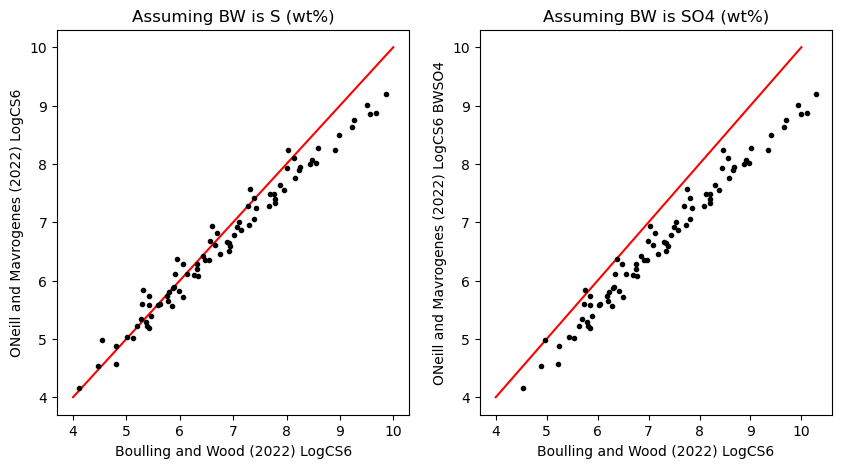

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([4, 10], [4, 10], '-r')
ax1.set_title('Assuming BW is S (wt%)')
ax1.plot(OM_calc['LogCS6_calc_BW22_format'],
         BW_calc['LogCS6_calc_BW22_format'], '.k')
ax1.set_ylabel('ONeill and Mavrogenes (2022) LogCS6')
ax1.set_xlabel('Boulling and Wood (2022) LogCS6')
ax2.set_title('Assuming BW is SO4 (wt%)')
ax2.plot([4, 10], [4, 10], '-r')
ax2.plot(OM_calc['LogCS6_calc_BW22_format_SO4'],
         BW_calc['LogCS6_calc_BW22_format'], '.k')
ax2.set_ylabel('ONeill and Mavrogenes (2022) LogCS6 BWSO4')
ax2.set_xlabel('Boulling and Wood (2022) LogCS6')